# Libraries

In [1]:
import numpy as np
from textblob import TextBlob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from scipy import sparse
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from tqdm.notebook import tqdm
import ipywidgets as widgets
from IPython.display import display



Progress:  30%|███       | 3/10 [00:18<00:30,  4.32s/it]

train.csv shape: (1697533, 9)
test.csv shape: (212192, 2)



Progress:  40%|████      | 4/10 [00:19<00:16,  2.82s/it]

First 5 rows of train.csv:
         Id   ProductId          UserId  HelpfulnessNumerator  \
0   914403  B0009W5KHM   AV6QDP8Q0ONK4                     2   
1   354887  6303079709  A2I8RXJN80A2D2                     0   
2  1407653  B004H0M2XC  A3FHV3RV8Z12E6                     0   
3  1377458  B003ZJ9536  A12VLTA3ZHVPUY                     1   
4   475323  630574453X  A13NM1PES9OXVN                     2   

   HelpfulnessDenominator        Time  \
0                       2  1341014400   
1                       0  1168819200   
2                       0  1386201600   
3                       1  1348704000   
4                       3   970012800   

                                         Summary  \
0                                  GOOD FUN FILM   
1                                   Movie Review   
2             When is it a good time to Consent?   
3                                          TRUTH   
4  Intelligent and bittersweet -- stays with you   

                           

Progress:  50%|█████     | 5/10 [00:19<00:10,  2.07s/it]

Description of train.csv:
                  Id  HelpfulnessNumerator  HelpfulnessDenominator  \
count  1.697533e+06          1.697533e+06            1.697533e+06   
mean   8.487660e+05          3.569048e+00            5.301422e+00   
std    4.900357e+05          1.727883e+01            2.024445e+01   
min    0.000000e+00          0.000000e+00            0.000000e+00   
25%    4.243830e+05          0.000000e+00            0.000000e+00   
50%    8.487660e+05          1.000000e+00            1.000000e+00   
75%    1.273149e+06          3.000000e+00            5.000000e+00   
max    1.697532e+06          6.084000e+03            6.510000e+03   

               Time         Score  
count  1.697533e+06  1.485341e+06  
mean   1.262422e+09  4.110517e+00  
std    1.289277e+08  1.197651e+00  
min    8.793792e+08  1.000000e+00  
25%    1.164413e+09  4.000000e+00  
50%    1.307491e+09  5.000000e+00  
75%    1.373242e+09  5.000000e+00  
max    1.406074e+09  5.000000e+00   

Description of test.csv:


Progress:  60%|██████    | 6/10 [00:20<00:06,  1.54s/it]

Info of train.csv:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697533 entries, 0 to 1697532
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Id                      int64  
 1   ProductId               object 
 2   UserId                  object 
 3   HelpfulnessNumerator    int64  
 4   HelpfulnessDenominator  int64  
 5   Time                    int64  
 6   Summary                 object 
 7   Text                    object 
 8   Score                   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 116.6+ MB

Info of test.csv:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212192 entries, 0 to 212191
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Id      212192 non-null  int64  
 1   Score   0 non-null       float64
dtypes: float64(1), int64(1)
memory usage: 3.2 MB


Progress:  70%|███████   | 7/10 [00:21<00:04,  1.43s/it]


Missing values in train.csv:
 Id                             0
ProductId                      0
UserId                         0
HelpfulnessNumerator           0
HelpfulnessDenominator         0
Time                           0
Summary                       32
Text                          62
Score                     212192
dtype: int64 

Missing values in test.csv:
 Id            0
Score    212192
dtype: int64 



Progress:  80%|████████  | 8/10 [00:22<00:02,  1.18s/it]

Correlation matrix of train.csv:
                               Id  HelpfulnessNumerator  \
Id                      1.000000             -0.018780   
HelpfulnessNumerator   -0.018780              1.000000   
HelpfulnessDenominator -0.021315              0.947211   
Time                    0.453398             -0.145893   
Score                  -0.055310             -0.015887   

                        HelpfulnessDenominator      Time     Score  
Id                                   -0.021315  0.453398 -0.055310  
HelpfulnessNumerator                  0.947211 -0.145893 -0.015887  
HelpfulnessDenominator                1.000000 -0.167752 -0.107640  
Time                                 -0.167752  1.000000  0.086102  
Score                                -0.107640  0.086102  1.000000   

Correlation matrix of test.csv:
         Id  Score
Id     1.0    NaN
Score  NaN    NaN 



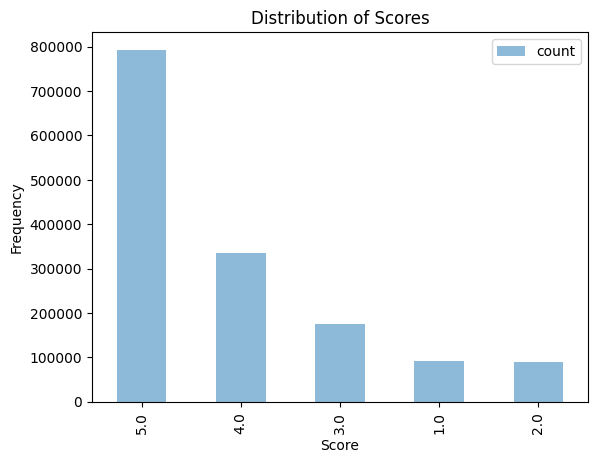

Progress:  90%|█████████ | 9/10 [00:22<00:01,  1.00s/it]

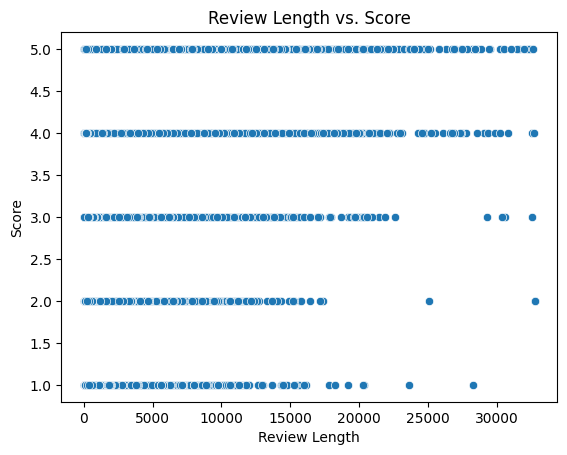

Progress: 100%|██████████| 10/10 [00:25<00:00,  1.39s/it]

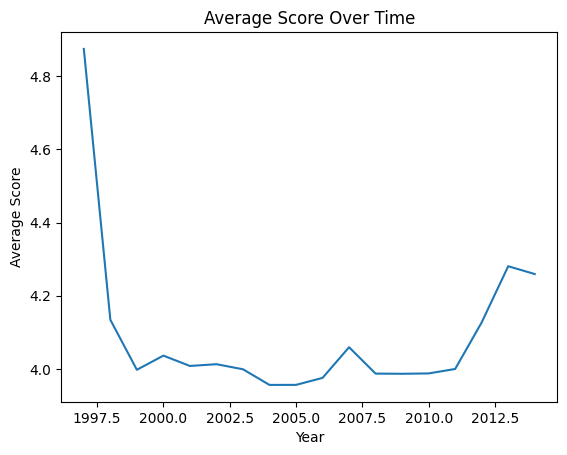

Progress: 11it [00:26,  2.39s/it]                        

EVERYTHING IS SET AND READY TO GO


In [20]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Initialize tqdm progress bar
steps = 10
pbar = tqdm(total=steps, desc="Progress")

# Load datasets
train = pd.read_csv('train.csv')
pbar.update(1)
time.sleep(0.5)  # Adding a slight delay to make progress visible
test = pd.read_csv('test.csv')
pbar.update(1)
time.sleep(0.5)

# Display dataset information
print(f"train.csv shape: {train.shape}")
print(f"test.csv shape: {test.shape}\n")
pbar.update(1)
time.sleep(0.5)

print("First 5 rows of train.csv:\n", train.head(), "\n")
print("First 5 rows of test.csv:\n", test.head(), "\n")
pbar.update(1)
time.sleep(0.5)

print("Description of train.csv:\n", train.describe(), "\n")
print("Description of test.csv:\n", test.describe(), "\n")
pbar.update(1)
time.sleep(0.5)

print("Info of train.csv:\n")
train.info()
print("\nInfo of test.csv:\n")
test.info()
pbar.update(1)
time.sleep(0.5)

print("\nMissing values in train.csv:\n", train.isnull().sum(), "\n")
print("Missing values in test.csv:\n", test.isnull().sum(), "\n")
pbar.update(1)
time.sleep(0.5)

# Select only numeric columns for correlation calculation
numeric_train = train.select_dtypes(include=[np.number])
numeric_test = test.select_dtypes(include=[np.number])

print("Correlation matrix of train.csv:\n", numeric_train.corr(), "\n")
print("Correlation matrix of test.csv:\n", numeric_test.corr(), "\n")
pbar.update(1)
time.sleep(0.5)

# Additional visualizations and analysis
# Visualizing the distribution of scores
if 'Score' in train.columns:
    train['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)
    plt.title('Distribution of Scores')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.show()
pbar.update(1)
time.sleep(0.5)

# Analysis of review text length
if 'Text' in train.columns:
    train['Review_Length'] = train['Text'].apply(lambda x: len(str(x)))
    sns.scatterplot(x='Review_Length', y='Score', data=train)
    plt.title('Review Length vs. Score')
    plt.xlabel('Review Length')
    plt.ylabel('Score')
    plt.show()
pbar.update(1)
time.sleep(0.5)

# Time analysis
if 'Time' in train.columns:
    train['Review_Time'] = pd.to_datetime(train['Time'], unit='s')
    train.groupby(train['Review_Time'].dt.year)['Score'].mean().plot(kind='line')
    plt.title('Average Score Over Time')
    plt.xlabel('Year')
    plt.ylabel('Average Score')
    plt.show()
pbar.update(1)
time.sleep(0.5)

print("EVERYTHING IS SET AND READY TO GO")
pbar.close()


Missing values per column:
Id                             0
ProductId                      0
UserId                         0
HelpfulnessNumerator           0
HelpfulnessDenominator         0
Time                           0
Summary                       32
Text                          62
Score                     212192
Review_Length                  0
Review_Time                    0
dtype: int64


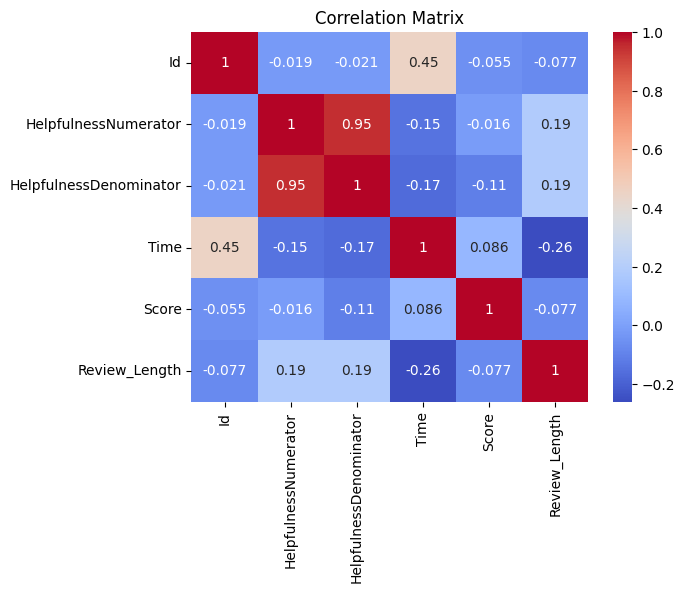

In [21]:
# Checking for missing values
print("Missing values per column:")
print(train.isnull().sum())

# Correlation matrix of the numerical features
# Select only numeric columns for correlation calculation
numeric_cols = train.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [22]:
# Drop rows with missing values in the training set
train = train.dropna()

In [23]:
# Randomly shuffle the dataset
radom_shuff = train.sample(frac=1, random_state=42).reset_index(drop=True)

stratified_samples = [None] * 9  # Initialize a list to hold nine subsets

remaining_data = radom_shuff

# Initialize tqdm progress bar
pbar = tqdm(total=9, desc="Creating Stratified Subsets")

# Generate nine distinct stratified subsets
for i in range(9):
    stratified_samples[i], remaining_data = train_test_split(
        remaining_data, train_size=100000, stratify=remaining_data['Score'], random_state=42
    )
    pbar.update(1)  # Update the progress bar

pbar.close()  # Close the progress bar when done

print("All stratified subsets are ready.")

Creating Stratified Subsets: 100%|██████████| 9/9 [00:04<00:00,  2.03it/s]

All stratified subsets are ready.


In [24]:
# Define the Naive class
class Naive(BaseEstimator, TransformerMixin):
    def __init__(self, laplace=1):
        self.laplace = laplace

    def _term_freq(self, X, class_mask):
        # Calculate term frequency for a given class
        term_freqs = X[class_mask].sum(axis=0)
        return term_freqs

    def _calc_prob(self, X, class_val, y):
        # Compute smoothed probability of terms for a given class label
        class_mask = y == class_val
        term_freqs = self._term_freq(X, class_mask)
        total_terms = class_mask.sum()
        return (term_freqs + self.laplace) / (total_terms + self.laplace)

    def fit(self, X, y=None):
        # Compute log ratio of probabilities between class 1 and class 0
        prob_1 = self._calc_prob(X, 1, y)
        prob_0 = self._calc_prob(X, 0, y)
        self.ratio_weights = sparse.csr_matrix(np.log(prob_1 / prob_0))
        return self

    def transform(self, X):
        # Apply ratio weights to the data
        return X.multiply(self.ratio_weights)

# Progress bar initialization for the feature engineering
steps = 6
pbar = tqdm(total=steps, desc="Feature Engineering Progress")

# Feature Engineering
feat = pd.DataFrame({
    "Rating": stratified_samples[0]["Score"],
})
pbar.update(1)

feat["ReviewLen"] = stratified_samples[0]['Text'].apply(lambda text: len(text))
pbar.update(1)

feat["TextSubj"] = stratified_samples[0]['Text'].apply(lambda text: TextBlob(text).sentiment.subjectivity if isinstance(text, str) else 0)
pbar.update(1)

feat["SummarySubj"] = stratified_samples[0]['Summary'].apply(lambda summary: TextBlob(summary).sentiment.subjectivity if isinstance(summary, str) else 0)
pbar.update(1)

feat["TextPolarity"] = stratified_samples[0]['Text'].apply(lambda text: TextBlob(text).sentiment.polarity if isinstance(text, str) else 0)
pbar.update(1)

feat["SummaryPolarity"] = stratified_samples[0]['Summary'].apply(lambda summary: TextBlob(summary).sentiment.polarity if isinstance(summary, str) else 0)
pbar.update(1)

pbar.close()  # Close the progress bar after all feature engineering steps are done

print("Feature engineering is complete.")

# Initialize Pipelines
pipeline1 = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=2000)),
    ('nb', Naive(laplace=1)),  
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipeline2 = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=500)),
    ('nb', Naive(laplace=1)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

print("Pipelines are initialized.")


Feature Engineering Progress: 100%|██████████| 6/6 [01:54<00:00, 19.10s/it]

Feature engineering is complete.
Pipelines are initialized.


In [28]:
probs = [1.0, 2.0, 3.0, 4.0, 5.0]
for prob in probs:
    feat[f'nb_text_prob_{prob}'] = 0
    feat[f'nb_summary_prob_{prob}'] = 0

for i, class_name in enumerate(probs):
    # Create binary target for the current class
    train_target = (stratified_samples[1]['Score'] == class_name).astype(int)

    # Fit the pipeline on the text data
    pipeline1.fit(stratified_samples[1]['Text'].values, train_target)

    # Fit the pipeline on the summary data
    pipeline2.fit(stratified_samples[1]['Summary'].values, train_target)

    # Predict probabilities for the text data and store in the feature dataframe
    feat[f'nb_text_prob_{class_name}'] = pipeline1.predict_proba(stratified_samples[0]['Text'].values)[:, 1]
    
    # Predict probabilities for the summary data and store in the feature dataframe
    feat[f'nb_summary_prob_{class_name}'] = pipeline2.predict_proba(stratified_samples[0]['Summary'].values)[:, 1]

In [31]:
# Model Training and Evaluation
X = feat.drop(columns=["Rating"])
y = feat["Rating"]

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split for training and testing is complete.")

Data split for training and testing is complete.


In [33]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.62575
Classification Report:
               precision    recall  f1-score   support

         1.0       0.55      0.50      0.52      1228
         2.0       0.33      0.17      0.22      1207
         3.0       0.44      0.33      0.38      2371
         4.0       0.44      0.31      0.36      4514
         5.0       0.72      0.89      0.79     10680

    accuracy                           0.63     20000
   macro avg       0.49      0.44      0.46     20000
weighted avg       0.59      0.63      0.60     20000



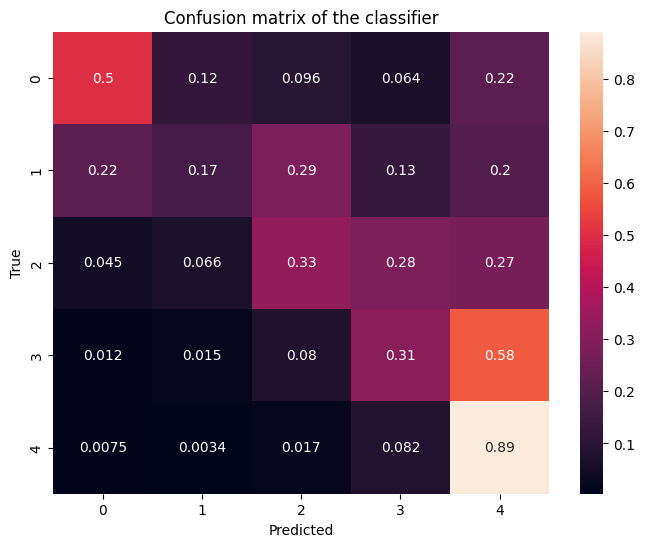

In [34]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred,normalize='true')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True,)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion matrix of the classifier")
plt.show()

Feature Engineering Progress: 100%|██████████| 6/6 [03:37<00:00, 36.21s/it]


Feature engineering complete.


Plotting Progress: 100%|██████████| 5/5 [00:01<00:00,  2.68it/s]

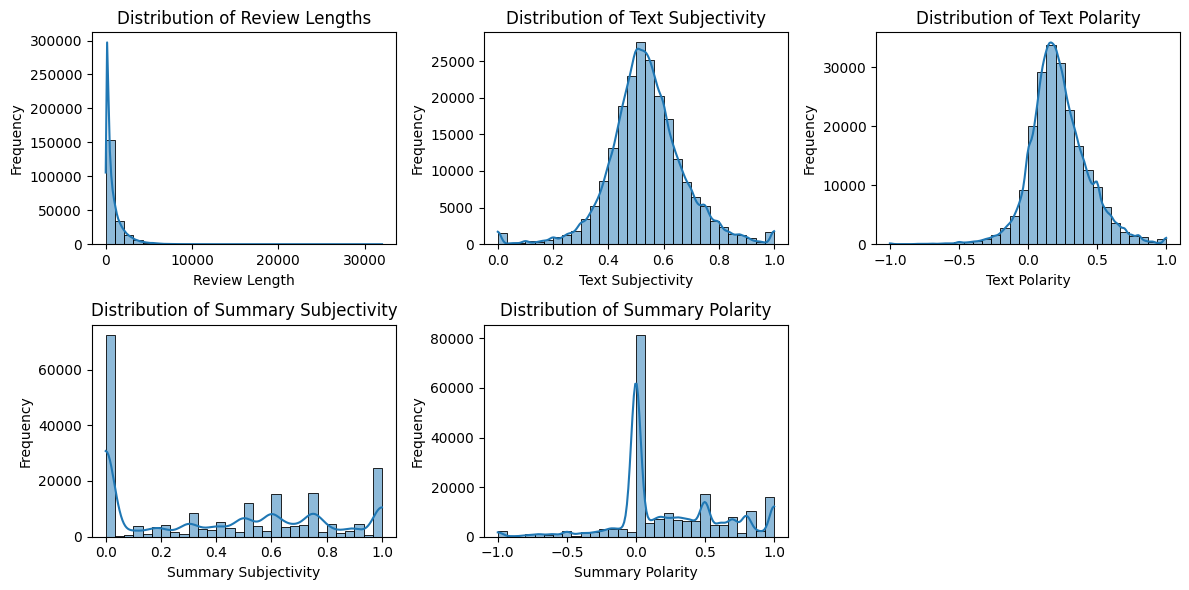

Plotting Progress: 100%|██████████| 5/5 [00:02<00:00,  2.31it/s]

Plotting complete.


In [35]:
# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Initialize progress bar
steps = 6  # Number of feature engineering steps
pbar = tqdm(total=steps, desc="Feature Engineering Progress")

# Filtering the dataset
filtered_data = train[train['Id'].isin(test['Id'])].copy()

# Feature Engineering
filtered_data['ReviewLen'] = filtered_data['Text'].apply(lambda x: len(x) if isinstance(x, str) else 0)
pbar.update(1)

filtered_data['TextSubj'] = filtered_data['Text'].apply(lambda text: TextBlob(text).sentiment.subjectivity if isinstance(text, str) else 0)
pbar.update(1)

filtered_data['TextPolarity'] = filtered_data['Text'].apply(lambda text: TextBlob(text).sentiment.polarity if isinstance(text, str) else 0)
pbar.update(1)

filtered_data['Text'] = filtered_data['Text'].fillna("")
pbar.update(1)

filtered_data['SummarySubj'] = filtered_data['Summary'].apply(lambda summary: TextBlob(summary).sentiment.subjectivity if isinstance(summary, str) else 0)
pbar.update(1)

filtered_data['SummaryPolarity'] = filtered_data['Summary'].apply(lambda summary: TextBlob(summary).sentiment.polarity if isinstance(summary, str) else 0)
pbar.update(1)

filtered_data['Summary'] = filtered_data['Summary'].fillna("")
pbar.close()  # Close progress bar after feature engineering is done

print("Feature engineering complete.")

# Initialize progress bar for plotting
plot_steps = 5  # Number of subplots
pbar = tqdm(total=plot_steps, desc="Plotting Progress")

# Plotting
plt.figure(figsize=(12, 6))

# Distribution of Review Lengths
plt.subplot(2, 3, 1)
sns.histplot(filtered_data['ReviewLen'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
pbar.update(1)

# Distribution of Text Subjectivity
plt.subplot(2, 3, 2)
sns.histplot(filtered_data['TextSubj'], bins=30, kde=True)
plt.title('Distribution of Text Subjectivity')
plt.xlabel('Text Subjectivity')
plt.ylabel('Frequency')
pbar.update(1)

# Distribution of Text Polarity
plt.subplot(2, 3, 3)
sns.histplot(filtered_data['TextPolarity'], bins=30, kde=True)
plt.title('Distribution of Text Polarity')
plt.xlabel('Text Polarity')
plt.ylabel('Frequency')
pbar.update(1)

# Distribution of Summary Subjectivity
plt.subplot(2, 3, 4)
sns.histplot(filtered_data['SummarySubj'], bins=30, kde=True)
plt.title('Distribution of Summary Subjectivity')
plt.xlabel('Summary Subjectivity')
plt.ylabel('Frequency')
pbar.update(1)

# Distribution of Summary Polarity
plt.subplot(2, 3, 5)
sns.histplot(filtered_data['SummaryPolarity'], bins=30, kde=True)
plt.title('Distribution of Summary Polarity')
plt.xlabel('Summary Polarity')
plt.ylabel('Frequency')
pbar.update(1)

plt.tight_layout()
plt.show()
pbar.close()  # Close progress bar after plotting is done

print("Plotting complete.")

In [36]:
# Initialize progress bar for the loop through labels in probs
pbar = tqdm(total=len(probs), desc="Training Pipelines and Predicting Probabilities")

# Initialize the feature columns for storing probabilities
for label in probs:
    filtered_data[f'nb_text_prob_{label}'] = 0
    filtered_data[f'nb_summary_prob_{label}'] = 0

# Loop through each label and fit pipelines
for idx, label in enumerate(probs):
    # Create binary target for the current class
    target = (stratified_samples[1]['Score'] == label).astype(int)

    # Fit the pipeline on the text data
    pipeline1.fit(stratified_samples[1]['Text'].values, target)

    # Fit the pipeline on the summary data
    pipeline2.fit(stratified_samples[1]['Summary'].values, target)

    # Predict probabilities for the text data and store in the feature dataframe
    filtered_data[f'nb_text_prob_{label}'] = pipeline1.predict_proba(filtered_data['Text'].values)[:, 1]

    # Predict probabilities for the summary data and store in the feature dataframe
    filtered_data[f'nb_summary_prob_{label}'] = pipeline2.predict_proba(filtered_data['Summary'].values)[:, 1]

    # Update the progress bar
    pbar.update(1)

pbar.close()  # Close progress bar after all labels are processed

print("Training and probability prediction are complete.")

# Drop columns that are not needed for prediction
drop_columns = ["Id", "ProductId", "UserId", "HelpfulnessNumerator", "HelpfulnessDenominator", "Time", "Summary", "Text", "Score"]

# Prepare data for prediction
data_for_prediction = filtered_data.drop(columns=drop_columns, errors='ignore')[X_train.columns]

# Predict the ratings using the random forest model
predicted_ratings = rf_model.predict(data_for_prediction)

# Store predicted ratings in the filtered data
filtered_data['Score'] = predicted_ratings

print("Prediction of ratings is complete.")

Training Pipelines and Predicting Probabilities: 100%|██████████| 5/5 [20:19<00:00, 243.88s/it]


Training and probability prediction are complete.
Prediction of ratings is complete.


In [37]:
final = filtered_data[['Id', 'Score']]
final.to_csv("final.csv", index=False)